# Introduction

Name        : Muhamad Arif Rachman Hatab

Batch       : FTDS-017-RMT

Dataset     : https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

Objective   : **Predict Students Adaptability Level in Online Education**

# Working Area

## 1 - Import Libraries

In [154]:
# For Dataframe Preparation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import phik

# Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Model Improvement
from sklearn.model_selection import RandomizedSearchCV

# Model Inferencing
import pickle
import json

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## 2 - Data Loading

In [114]:
# Load Data
data_origin = pd.read_csv('https://raw.githubusercontent.com/radianao/Dataset/main/students_adaptability_level_online_education.csv')

# Backup Origin Dataframe
df = data_origin.copy()

# Show head
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [115]:
# Show Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


All 14 columns data type are in object format.

In [116]:
# Missing Value
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

No missing values in our dataset, no need to analyze deeper in feature engineering.

In [117]:
# Split Data for Inferencing
data_inference = df.sample(n=5, random_state=1211)
df = df.drop(data_inference.index)
df.shape

(1200, 14)

In [118]:
# Describing Dataset
df.describe().T

,count,unique,top,freq
Gender,1200,2,Boy,660
Age,1200,6,21-25,373
Education Level,1200,3,School,527
Institution Type,1200,2,Non Government,818
IT Student,1200,2,No,898
Location,1200,2,Yes,931
Load-shedding,1200,2,Low,1000
Financial Condition,1200,3,Mid,874
Internet Type,1200,2,Mobile Data,692
Network Type,1200,3,4G,771


All columns are still in object format, we will need to encode all selected columns (features and target) later in preprocessing.

## 3 - Exploratory Data Analysis

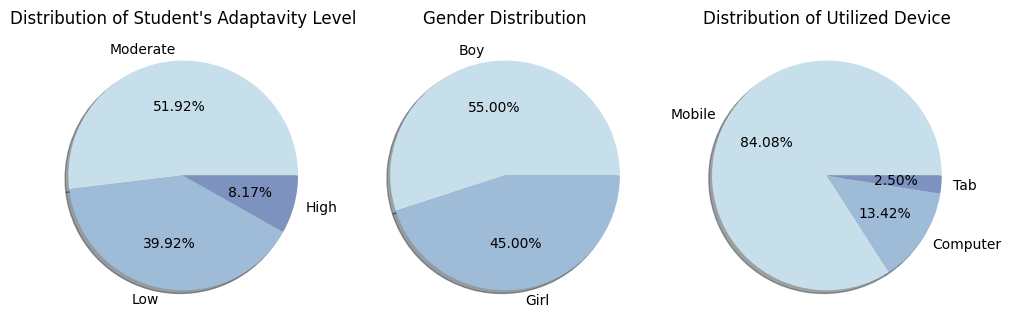

In [119]:
# Plotting Dataset Demograph

# Set sns Color Palette
palet = sns.color_palette("ch:s=.25,rot=-.25")
plt.figure(figsize=(10,30))

# Adaptavity Level
a = df['Adaptivity Level'].value_counts()
plt.subplot(131)
plt.pie(a, autopct='%1.2f%%', colors=palet, labels=a.index, shadow=True)
plt.title("Distribution of Student's Adaptavity Level")

# Gender
b = df['Gender'].value_counts()
plt.subplot(132)
plt.pie(b, autopct='%1.2f%%', colors=palet, labels=b.index, shadow=True)
plt.title("Gender Distribution")

# Device
c = df['Device'].value_counts()
plt.subplot(133)
plt.pie(c, autopct='%1.2f%%', colors=palet, labels=c.index, shadow=True)
plt.title("Distribution of Utilized Device")

plt.tight_layout()
plt.show()


Visualization above shows demographic of students by 3 category, adaptivity level, gender and device used as online studying platform. For adaptivity level, 39.92% students have low adaptivity level while there are 51.92% and only 8.17% with moderate and high adaptivity level.

55% Students are boys while the rest, 45% students, are girls. In other hand there are 3 type of devices utilized as studying platform, with majority students, 84.08% of students use mobile phone, and the rest 2.5% and 13.42% students utilize tab and computer respectively.

Below we will further see, how this demographic relates to student adaptivity level.

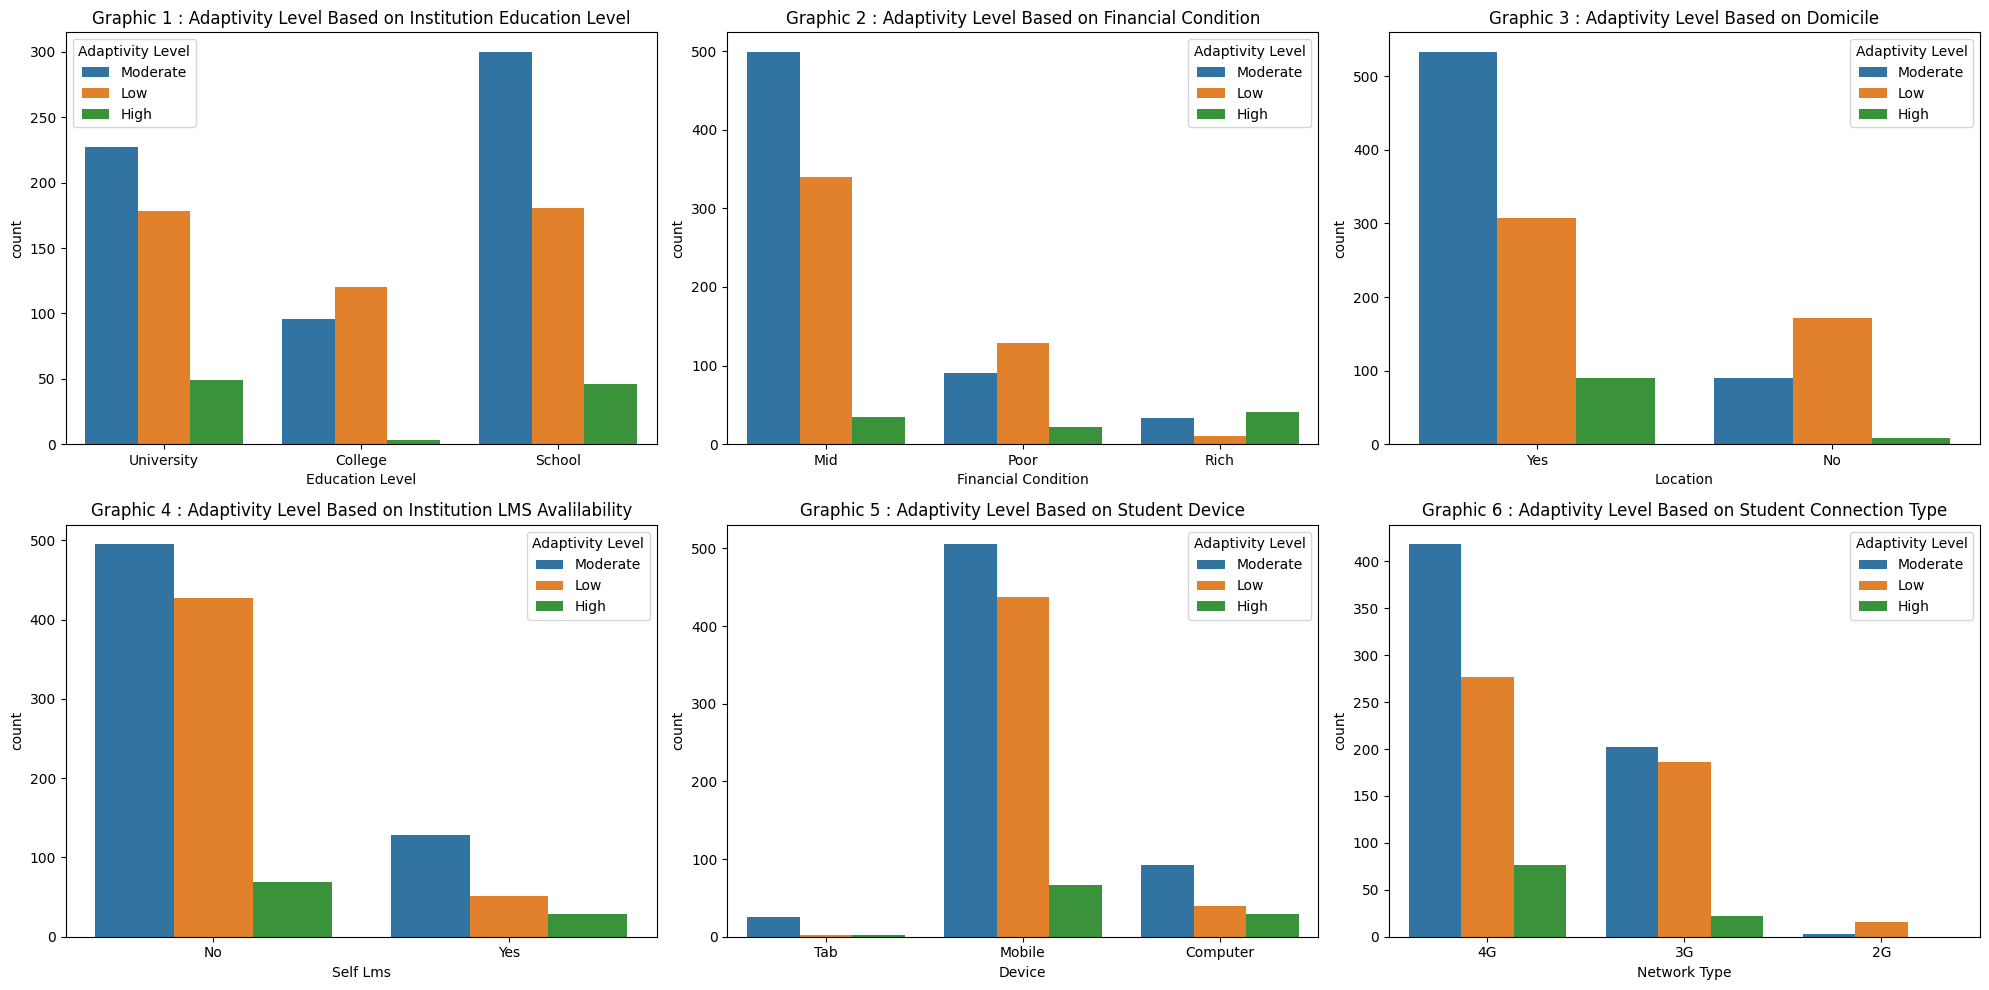

In [120]:
# Set Size
plt.figure(figsize=(20,10))

# Visualize Relation between Eductaion Level - Adaptivity Level
plt.subplot(231)
sns.countplot(data=df, hue='Adaptivity Level', x='Education Level')
plt.title('Graphic 1 : Adaptivity Level Based on Institution Education Level')

# Visualize Relation between Financial Condition - Adaptivity Level
plt.subplot(232)
sns.countplot(data=df, hue='Adaptivity Level', x='Financial Condition')
plt.title('Graphic 2 : Adaptivity Level Based on Financial Condition')

# Visualize Relation between Student' Domicile - Adaptivity Level
plt.subplot(233)
sns.countplot(data=df, hue='Adaptivity Level', x='Location')
plt.title('Graphic 3 : Adaptivity Level Based on Domicile')

# Visualize Relation between Self LMS - Adaptivity Level
plt.subplot(234)
sns.countplot(data=df, hue='Adaptivity Level', x='Self Lms')
plt.title('Graphic 4 : Adaptivity Level Based on Institution LMS Avalilability')

# Visualize Relation between Device
plt.subplot(235)
sns.countplot(data=df, hue='Adaptivity Level', x='Device')
plt.title('Graphic 5 : Adaptivity Level Based on Student Device')

# Visualize Relation between Network Type
plt.subplot(236)
sns.countplot(data=df, hue='Adaptivity Level', x='Network Type')
plt.title('Graphic 6 : Adaptivity Level Based on Student Connection Type')

plt.tight_layout()
plt.show()

Graphic 1 shows that majority of students with both low and high adaptivity level are from university and school level, college students has lower count of students with both high and low adaptivity level, this probably shows that the population of college student from the dataset are less than the other.

On the other hand, it is quite surprising that population of students with moderate financial condition are the most in low adaptivity level, though by looking on population of students with poor and rich financial condition we know that students with moderate financial condition are overally a majority from total population, logically if we are to make presumption, there should be correlation to student financial condition and their adaptivity level to online studying luckily this presumption is affirmated by how there are relatively more student with low adativity level for student in poor financial condition compared to other, moreover there are interestingly, relatively more students with high adaptivity level for students with rich financial condition. In short, there might be correlation between these 2 variables.

On visualization number 3, yes and no indicate wether student live in city or not, judging both condition on each total population, it is clearly shown that there are relatively more students with low adaptivity level for those that live outside the city, though there are also alot of students with low adaptivity level for those who live in the city, but looking closely to each distribution, it is clearly shown that for students who do not live in the city have lower rate of adaptivity.

Graphic 4 shows wether there is relation between students adaptivity level with institution availability on LMS, this visualization can not really show the relation between the 2.

Graphic 5 is interestingly easy to read, here we see that for total population of students who utilize mobile phone, there are relatively more students with low adaptivity level compared to other population of students with different device.

Lastly, logically attending schoole online with network below 4G is unrealistic reckon how both 3G and 2G are unreliable for quick surfing, this confirmed by how students with lower quality network (2G and 3G) has lower rate in understanding what they are actually studying.

## 4 - Data Preprocessing

### 4.1 - Split Train & Test Set

In [121]:
# Split Target & Features
y = df['Adaptivity Level']
x = df.drop(['Adaptivity Level'], axis=1)

# Split Train & Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11, stratify=y)
print('Train-set size : ', x_train.shape)
print('Test-set size : ', x_test.shape)

Train-set size :  (960, 13)
Test-set size :  (240, 13)


### 4.2 - Handling Outliers

Since the dataset contains only categorical data there is no need to look into outliers moreover handling them.

### 4.3 - Missing Values

We already check firsthand that there are no missing values from overall dataset, deeper analysis for missing values is not needed.

### 4.4 - Feature Selection

To ease the process of features selection, we will use phik correlation since we only have categorical data in our dataset.

In [122]:
# Make Copy to Check Correlation
correlation_df = x_train.copy()
correlation_df['Adaptivity'] = y_train.copy()
correlation_df.global_phik()

(array([[0.34729593],
        [1.        ],
        [0.54800295],
        [0.52195513],
        [0.72396446],
        [0.74875488],
        [0.63242175],
        [0.83325595],
        [0.51803596],
        [0.57739752],
        [0.87705132],
        [0.70248793],
        [0.75589667],
        [0.8964905 ]]),
 array(['Gender', 'Age', 'Education Level', 'Institution Type',
        'IT Student', 'Location', 'Load-shedding', 'Financial Condition',
        'Internet Type', 'Network Type', 'Class Duration', 'Self Lms',
        'Device', 'Adaptivity'], dtype=object))

We see that all columns, except Gender, has value of importance above .5, this means that we will exclude gender and take the rest for the multicollinearity check below.

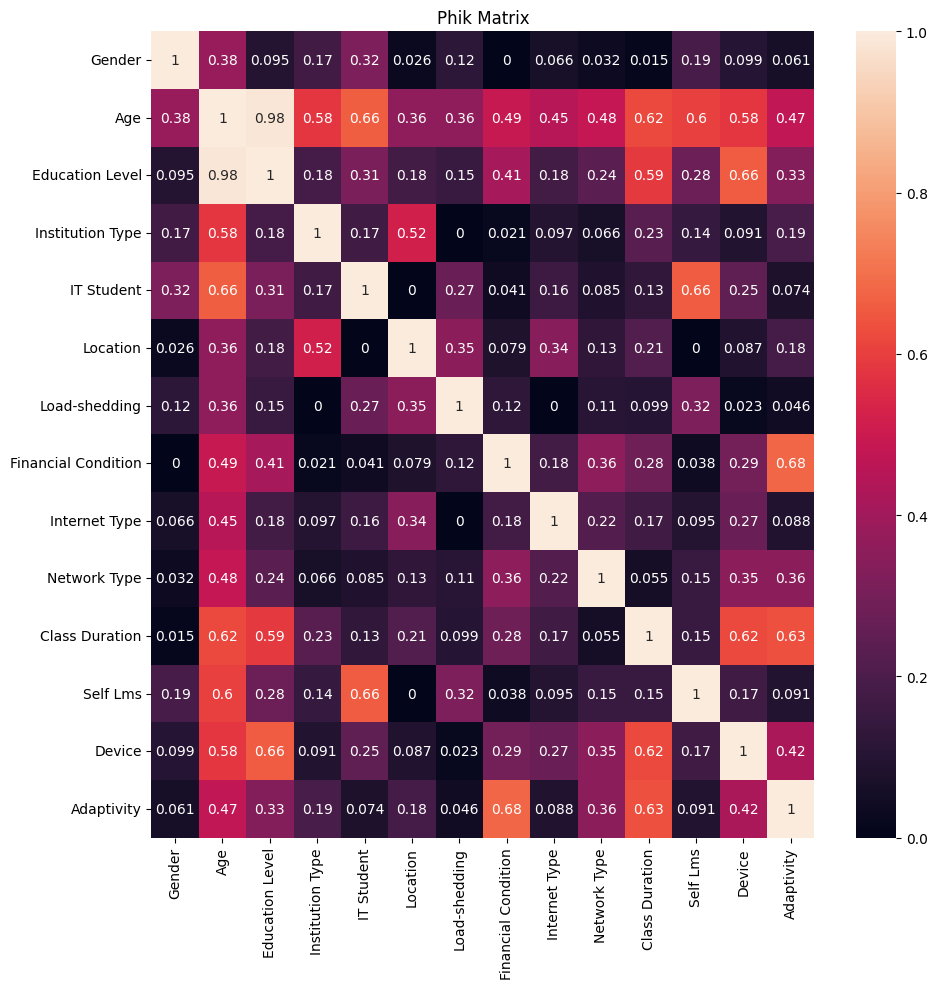

In [123]:
# Check correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation_df.phik_matrix(), annot=True)
plt.title('Phik Matrix')
plt.tight_layout()

We will check multicolinearty of columns with higher value of importance first then eliminate columns with high multicolinearity that could be checked on heatmap above. Elimination process is as follows:
* Pick features with higher value of importance first and go descending.
* Make features with higher value of importance a priority then go eleminating other features by level of multicollinearity above.

Then in the end result, we get age, financial condition, location, load-shedding, internet type, and network type. Comparing to what we had assume in EDA, it is actually pretty much confirming all of our assumptions, it is because of how age highly correlated to class duration, device used and education level, but we only pick age because of its higher value of importance.

In [124]:
# Selected Columns
selected = ['Age', 'Financial Condition', 'Location', 'Load-shedding', 'Internet Type', 'Network Type']

# Train and Test Set with Selected Columns
x_train_selected = x_train[selected]
x_test_selected = x_test[selected]

In [125]:
# Check Shape
print('train shape :', x_train_selected.shape)
print('test shape :', x_test_selected.shape)

train shape : (960, 6)
test shape : (240, 6)


## 5 - Encoder & Baseline Model Definitions with Pipeline

Since there are no natural order in our dataset utilizing only labelencoder will 'confuse' our model and resulting in poor performance, hence we will utilize both one hot encoder and label encoder that are simplified into DictVectorizer.

But to apply this methode we need to transform our dataset into dictionary, then we will also need Dictifier so that it can fit right through to pipeline with our 'encoder'.

In [126]:
# Define Dictifier class to turn df into dictionary as part of pipeline
class Dictifier(BaseEstimator, TransformerMixin):       
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

In [127]:
# Pipeline for Each Baseline Model
pipe_lr = Pipeline([('dictifier', Dictifier()), ('encoder', DictVectorizer(sparse=False)), ('model', LogisticRegression(max_iter=200, random_state=11))])
pipe_svc = Pipeline([('dictifier', Dictifier()), ('encoder', DictVectorizer(sparse=False)), ('model', SVC(random_state=11))])
pipe_dt = Pipeline([('dictifier', Dictifier()), ('encoder', DictVectorizer(sparse=False)), ('model', DecisionTreeClassifier(random_state=11))])
pipe_rf = Pipeline([('dictifier', Dictifier()), ('encoder', DictVectorizer(sparse=False)), ('model', RandomForestClassifier(random_state=11))])
pipe_ab = Pipeline([('dictifier', Dictifier()), ('encoder', DictVectorizer(sparse=False)), ('model', AdaBoostClassifier(random_state=11))])

Foila, behold our long and marvelous pipelines for each baseline model that we are gonna compare later on.

Every baseline model with have its randomstate set to a specific number to ensure no change happen when we rerun the program. As for logistic regression max_iteration set to to 200 to avoid warning of reached maximum iteration.

## 6 - Model Training

Below are training for each baseline model, using pipeline.

In [128]:
# Logstic Regression
pipe_lr.fit(x_train_selected, y_train)

# SVC
pipe_svc.fit(x_train_selected, y_train)

# Decission Tree
pipe_dt.fit(x_train_selected, y_train)

# Random Forest
pipe_rf.fit(x_train_selected, y_train)

# Adaboost
pipe_ab.fit(x_train_selected, y_train)

Pipeline(steps=[('dictifier', Dictifier()),
                ('encoder', DictVectorizer(sparse=False)),
                ('model', AdaBoostClassifier(random_state=11))])

## 7 - Model Evaluation

Since the model only end-objective is to know the overall effectiveness of online studies, and not look deep into each target label, utilizing accuracy for metrics scoring will still representative towards what we wanted to analyze.

In [129]:
cross_val_scoreslr = cross_val_score(pipe_lr, x_test_selected, y_test, 
                                   scoring='accuracy', cv=10)
print("Linear Regression accuracy: ", np.mean(np.sqrt(np.abs(cross_val_scoreslr))))                                

Linear Regression accuracy:  0.7615133741986541


In [130]:
cross_val_scoressvc = cross_val_score(pipe_svc, x_test_selected, y_test, 
                                   scoring='accuracy', cv=10)
print("SVC accuracy: ", np.mean(np.sqrt(np.abs(cross_val_scoressvc))))                                

SVC accuracy:  0.7433887749380479


In [131]:
cross_val_scoresdt = cross_val_score(pipe_dt, x_test_selected, y_test, 
                                   scoring='accuracy', cv=10)
print("SVC accuracy: ", np.mean(np.sqrt(np.abs(cross_val_scoresdt)))) 

SVC accuracy:  0.8074246296819613


In [132]:
cross_val_scoresrf = cross_val_score(pipe_rf, x_test_selected, y_test, 
                                   scoring='accuracy', cv=10)
print("Random Forest accuracy: ", np.mean(np.sqrt(np.abs(cross_val_scoresrf)))) 

Random Forest accuracy:  0.8127709100269547


In [133]:
cross_val_scoresab = cross_val_score(pipe_ab, x_test_selected, y_test, 
                                   scoring='accuracy', cv=10)
print("Adaboost accuracy: ", np.mean(np.sqrt(np.abs(cross_val_scoresab))))                                

Adaboost accuracy:  0.7070122920255054


From all cross validation results, we get that Random Forest is interestingly the best baseline model with accuracy score of 81.3% while Adaboost has the lowest accuracy score which at 70.7%. Comparing all model computational speed for predicting, Random Forest is 1.1 slower than Adaboost, which is a given since Random Forest works parallel and Adaboost working sequentialy.

As conclusion, with slightly longer predict computation time and accuracy score of 81.3%, Random Forest is considered the best basline model compared to other.

## 8 - Hyperparameter Tuning

In [142]:
# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=1, stop=1000, num = 10)]
max_features = ['sqrt', 'log2']
max_depth = [3,5]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]


We utilize RandomizeSearchCV as model tuner since it is faster compared to GridSearchCV.

In [143]:
parameter = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__criterion':['entropy','gini']
}

In [147]:
# Train with GridSearchCV
rs = RandomizedSearchCV(pipe_rf, parameter, n_iter=50, cv=5, random_state=11)
rs.fit(x_train_selected, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('dictifier', Dictifier()),
                                             ('encoder',
                                              DictVectorizer(sparse=False)),
                                             ('model',
                                              RandomForestClassifier(random_state=11))]),
                   n_iter=50,
                   param_distributions={'model__criterion': ['entropy', 'gini'],
                                        'model__max_depth': [3, 5],
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 2, 4, 6,
                                                                    8],
                                        'model__min_samples_split': [2, 5, 10,
                                                                     14],
                                        'model__n_estimators': [1, 112, 223,
                                                                334, 445, 556,
                                                                667, 778, 889,
                                                                1000]},
                   random_state=11)

In [148]:
# Get Best Hyperparameters
rs.best_params_

{'model__n_estimators': 1000,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 2,
 'model__max_features': 'sqrt',
 'model__max_depth': 5,
 'model__criterion': 'gini'}

In [149]:
# Get Best Estimator
pipe_tuned_rf = rs.best_estimator_

# Check Performance Model again Both Set
y_pred_train = pipe_tuned_rf.predict(x_train_selected)
y_pred_test = pipe_tuned_rf.predict(x_test_selected)
print('Classification Report on Train Set : \n', classification_report(y_train, y_pred_train), '\n')
print('\nClassification Report on Test Set : \n', classification_report(y_test, y_pred_test), '\n')

Classification Report on Train Set : 
               precision    recall  f1-score   support

        High       0.70      0.38      0.49        79
         Low       0.76      0.56      0.64       383
    Moderate       0.69      0.88      0.77       498

    accuracy                           0.71       960
   macro avg       0.72      0.61      0.64       960
weighted avg       0.72      0.71      0.70       960
 


Classification Report on Test Set : 
               precision    recall  f1-score   support

        High       0.67      0.21      0.32        19
         Low       0.55      0.43      0.48        96
    Moderate       0.60      0.77      0.67       125

    accuracy                           0.59       240
   macro avg       0.61      0.47      0.49       240
weighted avg       0.59      0.59      0.57       240
 



prediction accuracy for train set and test set are .71 and .59 respectively, these indicate that the tuned model correctly predict 71% and 59% students adaptability level from total data predicted, it is as clear that tuned performance is actually declining from prediction accuracy of 83% to 59% (in test set), hence we will save our baseline randomforest model to be utilize in model inferencing.

in conclusion, improvement could be done with tweaking hyper parameter used in tuning, aplying both GridSearch and RandomSearch as comparation. Other than that re-evaluate all baseline model with GridSearch and RandomizedSearch could also help in improveming end performance results.

## 9 - Model Inference

To ease the inferencing we will import label encoder and Random Forest Model without pipeline.

0.63 0.98 0.59 0.63 0.99 0.59


In [163]:
rf_pipe = Pipeline([('encoder', DictVectorizer(sparse=False)), ('model', RandomForestClassifier(random_state=11))])
rf_pipe.fit(x_train_selected.to_dict("records"), y_train)

Pipeline(steps=[('encoder', DictVectorizer(sparse=False)),
                ('model', RandomForestClassifier(random_state=11))])

In [165]:
# Saving Pipeline
with open('pipe_randomforest.pkl', 'wb') as file_1:
    pickle.dump(rf_pipe, file_1)

# Saving Selected Columns
with open('selected_col.txt', 'w') as file_2:
    json.dump(selected, file_2)

# Convert Dataframe of Sample to JSON
sample = data_inference.to_json()
with open('data_sample.txt', 'w') as file_3:
    json.dump(sample, file_3)

## 10 - Conclusion

1. The hypothesis where we assume student's adaptability level for studying online is influenced by columns with logical factors like financial, device and how hard the study material was. This is affirmed on feature correlation analysis, in addition it also confirmed that adaptability level is heavily influenced by column `Age`, with correlation value at 1. which the highest compared to other selected columns.

2. With mean accuracy of 83% at train set, Random Forest considered as the better baseline model overall..

3. Model improvement via hyperparameter tuning has failed in improving mean of accuracy score in both train and test set, with .71 for train set and .59 on test set.

4. While overall model result are considered proper enough (accuracy at 83%), improvement still could be done at re-evaluation all baseline model with GridSearch and RandomizedSearch to fine the best model from all tuned baseline models.